In [31]:
import os
import matplotlib.pyplot as plt




In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [34]:
import numpy as np

In [35]:
train_dir = r"D:\catvsdog\catdog\train"
test_dir = r"D:\catvsdog\catdog\test"

Number of cat images: 279
Number of dog images: 278


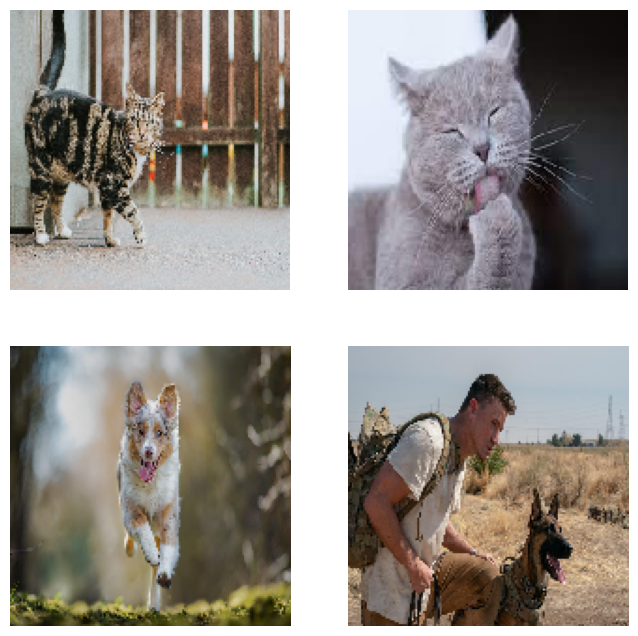

In [36]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Get file names in each directory
cat_filenames = os.listdir(train_cats_dir)
dog_filenames = os.listdir(train_dogs_dir)

print(f'Number of cat images: {len(cat_filenames)}')
print(f'Number of dog images: {len(dog_filenames)}')

# Visualize a few sample images from each class
sample_images = []

# Display some cat and dog images
for folder in [train_cats_dir, train_dogs_dir]:
    filenames = os.listdir(folder)
    for filename in filenames[:2]:  # Display 2 images from each folder
        image_path = os.path.join(folder, filename)
        img = load_img(image_path, target_size=(150, 150))
        sample_images.append(img)

# Plot the images
plt.figure(figsize=(8, 8))
for i, image in enumerate(sample_images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [37]:


# Data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize the image
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only normalization for validation/test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Since we have two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [38]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])



In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,  
    epochs=20,
    validation_data=test_generator,
    validation_steps=50
)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.4665 - loss: 0.8657 - val_accuracy: 0.4929 - val_loss: 0.6929
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.5092 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.5234 - loss: 0.6923 - val_accuracy: 0.6071 - val_loss: 0.6877
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.5697 - loss: 0.6821 - val_accuracy: 0.6357 - val_loss: 0.6825
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.5684 - loss: 0.6846 - val_accuracy: 0.5286 - val_loss: 0.6826
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.6192 - loss: 0.6493 - val_accuracy: 0.5571 - val_loss: 0.7214
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.6094 - loss: 0.6630 - val_accuracy: 0.5643 - val_loss: 0.6835
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.5763 - loss: 0

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6189 - loss: 0.7744 
Test Accuracy: 62.14%


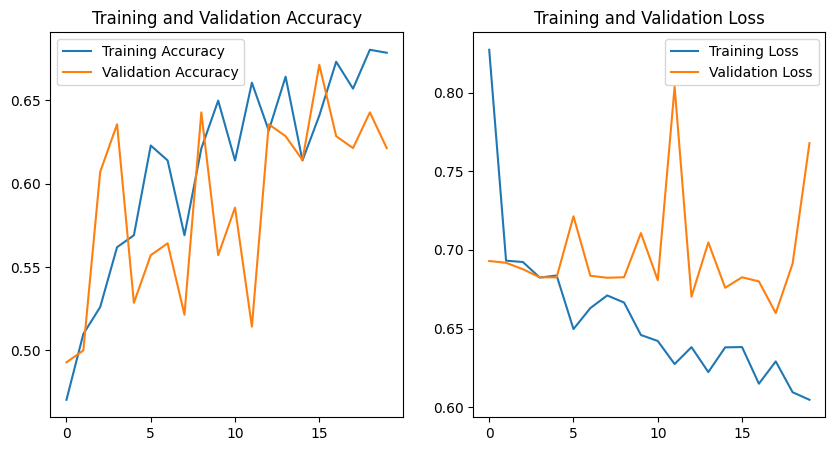

In [42]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plotting training and validation accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6217 - loss: 0.7685 
Test Accuracy: 62.14%


c:\Users\Nitesh\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


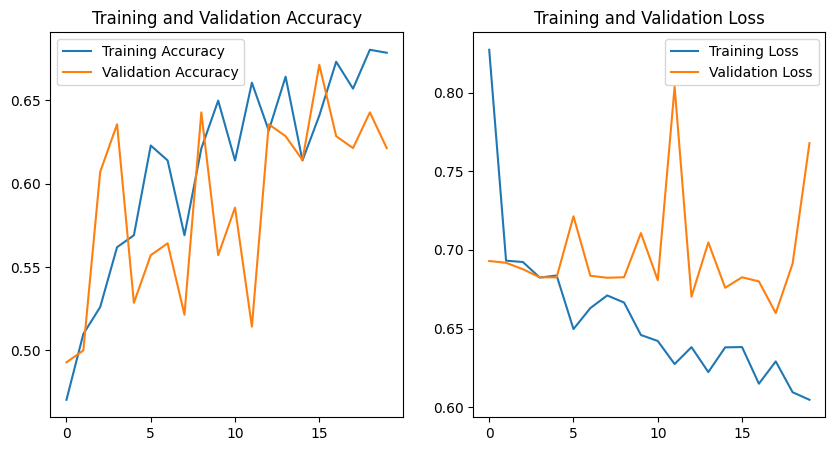

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step  


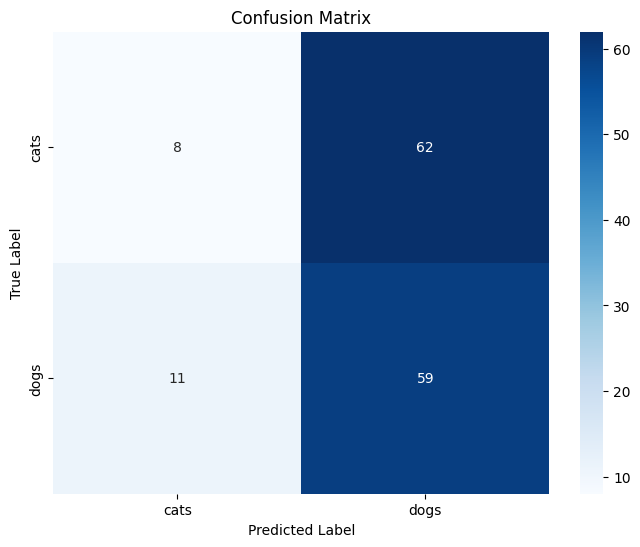

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plotting training and validation accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Generate predictions from the test set
test_generator.reset()  # Reset the generator
Y_pred = model.predict(test_generator, steps=50)
y_pred = np.where(Y_pred > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Get true labels from test_generator
true_labels = test_generator.classes  # Assuming test_generator has a 'classes' attribute
class_labels = list(test_generator.class_indices.keys())  # Get class labels (e.g., ['cats', 'dogs'])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
# Save the entire model to a HDF5 file
model.save('cat_dog_classifier.h5')
